# DengAI: Predicting Disease Spread

In [165]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
features_raw_df = pd.read_csv("data/dengue_features_train.csv")
labels_raw_df = pd.read_csv("data/dengue_labels_train.csv")

In [167]:
print("features_raw_df.shape", features_raw_df.shape)
features_raw_df.head()

features_raw_df.shape (1456, 24)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [24]:
features_raw_df.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [25]:
print("labels_raw_df.shape", labels_raw_df.shape)
labels_raw_df.head()

labels_raw_df.shape (1456, 4)


,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [26]:
labels_raw_df.dtypes

city           object
year            int64
weekofyear      int64
total_cases     int64
dtype: object

In [27]:
features_df = features_raw_df.copy()
labels_df = labels_raw_df.copy()

### Exploratory Data Analysis

In [28]:
features_df['week_start_date'] = pd.to_datetime(features_df.week_start_date, format='%Y-%m-%d')

In [29]:
features_df.dtypes

city                                             object
year                                              int64
weekofyear                                        int64
week_start_date                          datetime64[ns]
ndvi_ne                                         float64
ndvi_nw                                         float64
ndvi_se                                         float64
ndvi_sw                                         float64
precipitation_amt_mm                            float64
reanalysis_air_temp_k                           float64
reanalysis_avg_temp_k                           float64
reanalysis_dew_point_temp_k                     float64
reanalysis_max_air_temp_k                       float64
reanalysis_min_air_temp_k                       float64
reanalysis_precip_amt_kg_per_m2                 float64
reanalysis_relative_humidity_percent            float64
reanalysis_sat_precip_amt_mm                    float64
reanalysis_specific_humidity_g_per_kg           

In [36]:
# Null check
pd.isnull(features_df).any()

city                                     False
year                                     False
weekofyear                               False
week_start_date                          False
ndvi_ne                                   True
ndvi_nw                                   True
ndvi_se                                   True
ndvi_sw                                   True
precipitation_amt_mm                      True
reanalysis_air_temp_k                     True
reanalysis_avg_temp_k                     True
reanalysis_dew_point_temp_k               True
reanalysis_max_air_temp_k                 True
reanalysis_min_air_temp_k                 True
reanalysis_precip_amt_kg_per_m2           True
reanalysis_relative_humidity_percent      True
reanalysis_sat_precip_amt_mm              True
reanalysis_specific_humidity_g_per_kg     True
reanalysis_tdtr_k                         True
station_avg_temp_c                        True
station_diur_temp_rng_c                   True
station_max_t

In [31]:
is_iq = features_df['city']=='iq'
is_sj = features_df['city']=='sj'

In [32]:
features_df_iq = features_df[is_iq]
features_df_sj = features_df[is_sj]

In [100]:
feats = list(features_df.loc[:,'ndvi_ne':'station_precip_mm'].columns)
feats

['ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm']

In [33]:
def plot_features(features):
    fig, axs = plt.subplots(len(features))
    for i, feature in enumerate(features):
        axs[i].plot(features_df_iq.week_start_date, features_df_iq[feature], label='Iquito')
        axs[i].plot(features_df_sj.week_start_date, features_df_sj[feature], label='San Juan')
        axs[i].legend()
        axs[i].set_title(feature)
    fig.set_figheight(3*len(features))
    fig.set_figwidth(15)
    plt.show()

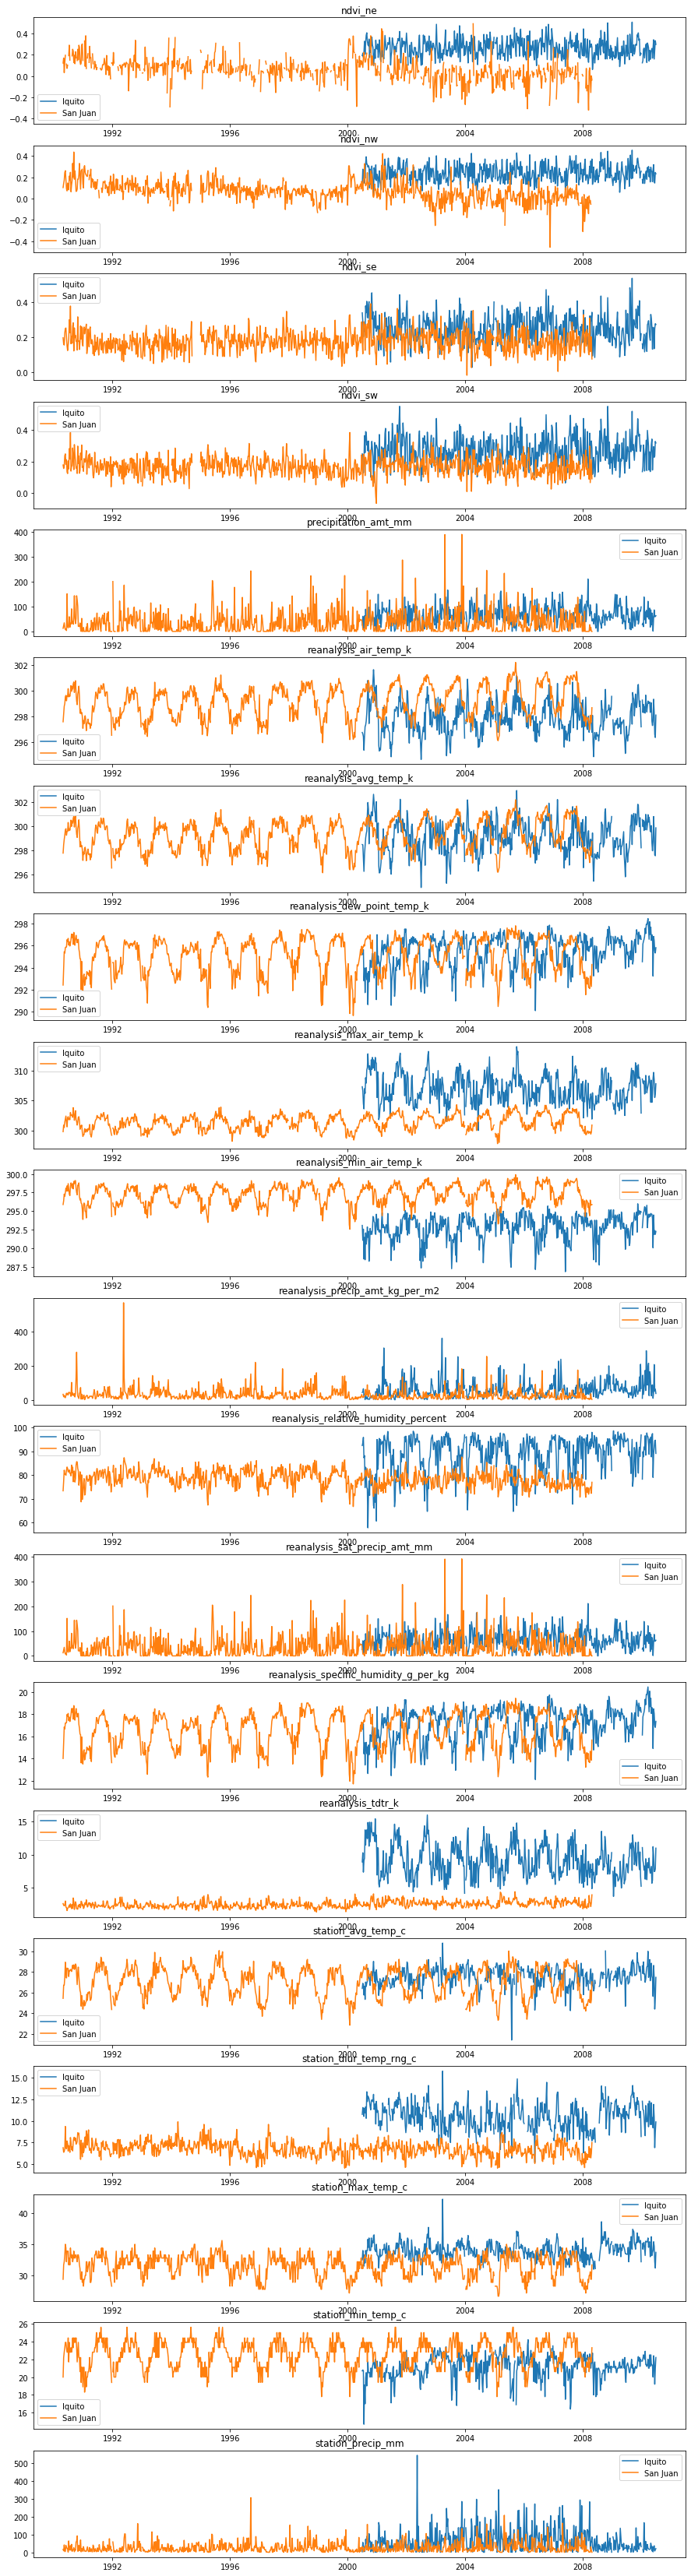

In [34]:
plot_features(feats)

Since there are some missing data, this will be filled with the previous value.

In [38]:
features_df_iq.fillna(method='ffill', inplace=True)
features_df_sj.fillna(method='ffill', inplace=True)

In [44]:
is_iq_labels = labels_df['city']=='iq'
is_sj_labels = labels_df['city']=='sj'

In [45]:
labels_df_iq = labels_df[is_iq_labels]
labels_df_sj = labels_df[is_sj_labels]

In [85]:
print('San Juan')
print('mean: ', labels_df_sj.total_cases.mean())
print('var :', labels_df_sj.total_cases.var())

print('\nIquitos')
print('mean: ', labels_df_iq.total_cases.mean())
print('var :', labels_df_iq.total_cases.var())

San Juan
mean:  34.18055555555556
var : 2640.045439691045

Iquitos
mean:  7.565384615384615
var : 115.89552393656412


Since the variance is much larger than the mean, the best approach would be a Negative Binomial Regression.

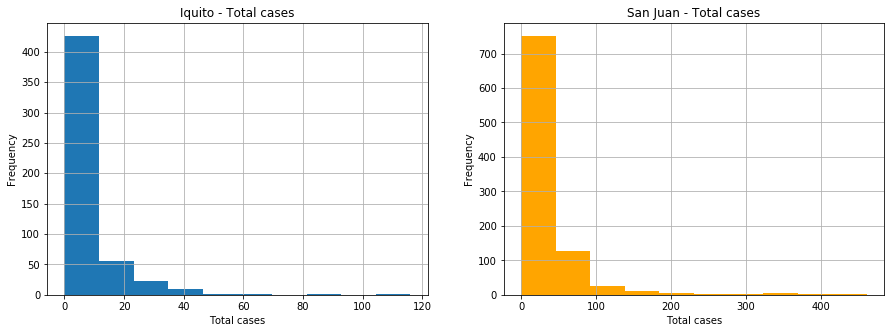

In [73]:
fig, axs = plt.subplots(1,2)
labels_df_iq.total_cases.hist(ax=axs[0])
axs[0].set_title('Iquito - Total cases')
labels_df_sj.total_cases.hist(ax=axs[1], color='orange')
axs[0].set_xlabel('Total cases')
axs[0].set_ylabel('Frequency')
axs[1].set_title('San Juan - Total cases')
axs[1].set_xlabel('Total cases')
axs[1].set_ylabel('Frequency')
fig.set_figheight(5)
fig.set_figwidth(15)
plt.show()

In [95]:
df_iq = pd.concat([features_df_iq, labels_df_iq.total_cases], axis=1)
df_sj = pd.concat([features_df_sj, labels_df_sj.total_cases], axis=1)

In [99]:
feats

['ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm',
 'total_cases',
 'total_cases']

In [103]:
feats.append('total_cases')

In [105]:
df_iq_feats = df_iq.loc[:,feats]
df_sj_feats = df_sj.loc[:,feats]

In [106]:
# compute the correlations
sj_correlations = df_iq_feats.corr()
iq_correlations = df_sj_feats.corr()

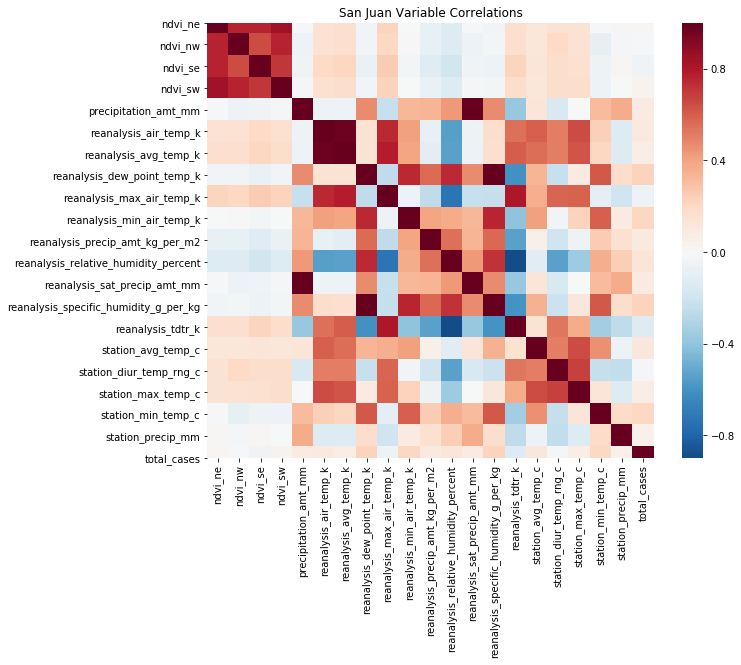

In [121]:
plt.figure(figsize = (10,8))
sj_corr_heat = sns.heatmap(sj_correlations, center=0, cmap='RdBu_r')
plt.title('San Juan Variable Correlations')
plt.show()

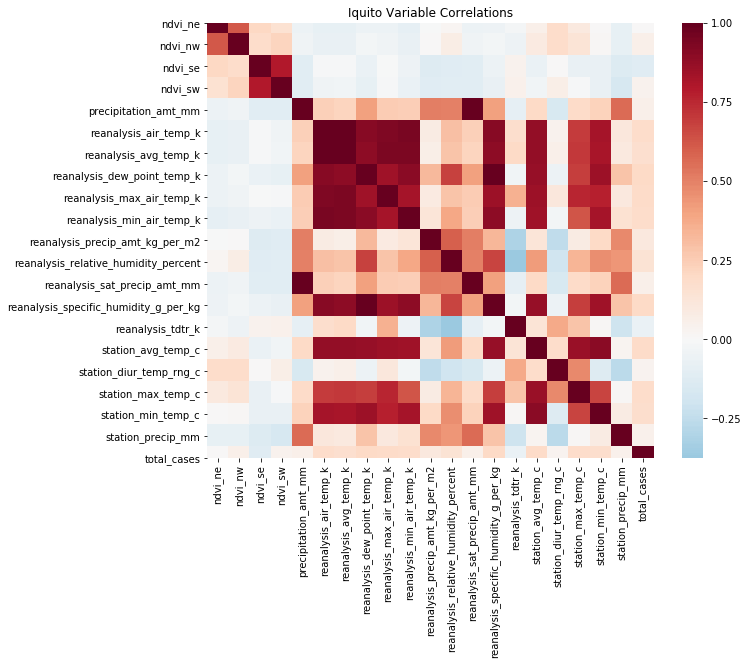

In [122]:
plt.figure(figsize = (10,8))
iq_corr_heat = sns.heatmap(iq_correlations, center=0, cmap='RdBu_r')
plt.title('Iquito Variable Correlations')
plt.show()

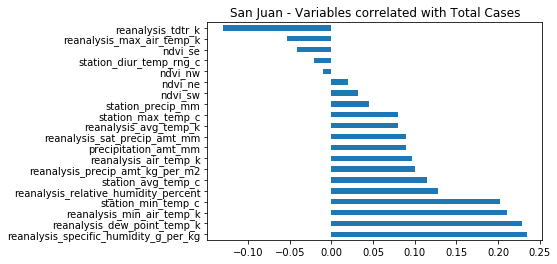

In [126]:
(sj_correlations
     .total_cases
     .drop('total_cases') # don't compare with itself
     .sort_values(ascending=False)
     .plot
     .barh())
plt.title('San Juan - Variables correlated with Total Cases')
plt.show()

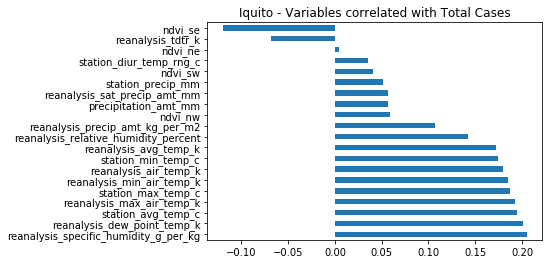

In [127]:
(iq_correlations
     .total_cases
     .drop('total_cases') # don't compare with itself
     .sort_values(ascending=False)
     .plot
     .barh())
plt.title('Iquito - Variables correlated with Total Cases')
plt.show()

In [149]:
most_correlated_feats_iq = iq_correlations.total_cases.drop('total_cases').abs().sort_values(ascending=True).index[:4]
most_correlated_feats_sj = sj_correlations.total_cases.drop('total_cases').abs().sort_values(ascending=True).index[:4]

In [150]:
most_correlated_feats = set(most_correlated_feats_iq + most_correlated_feats_sj)
most_correlated_feats

{'ndvi_nendvi_nw',
 'ndvi_swstation_diur_temp_rng_c',
 'station_diur_temp_rng_cndvi_ne',
 'station_precip_mmndvi_sw'}

In [155]:
features_raw_df.set_index(['city', 'year', 'weekofyear'])

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city year weekofyear                                                           
sj   1990 18              1990-04-30  0.122600  0.103725  0.198483  0.177617   
          19              1990-05-07  0.169900  0.142175  0.162357  0.155486   
          20              1990-05-14  0.032250  0.172967  0.157200  0.170843   
          21              1990-05-21  0.128633  0.245067  0.227557  0.235886   
          22              1990-05-28  0.196200  0.262200  0.251200  0.247340   
...                              ...       ...       ...       ...       ...   
iq   2010 21              2010-05-28  0.342750  0.318900  0.256343  0.292514   
          22              2010-06-04  0.160157  0.160371  0.136043  0.225657   
          23              2010-06-11  0.247057  0.146057  0.250357  0.233714   
          24              2010-06-18  0.333914  0.245771  0.278886  0.325486   
          25              2010-06-25  0.298186  0.232971  0.274214  0.315757   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city year weekofyear                                                
sj   1990 18                         12.42             297.572857   
          19                         22.82             298.211429   
          20                         34.54             298.781429   
          21                         15.36             298.987143   
          22                          7.52             299.518571   
...                                    ...                    ...   
iq   2010 21                         55.30             299.334286   
          22                         86.47             298.330000   
          23                         58.94             296.598571   
          24                         59.67             296.345714   
          25                         63.22             298.097143   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
city year weekofyear                                                       
sj   1990 18                     297.742857                   292.414286   
          19                     298.442857                   293.951429   
          20                     298.878571                   295.434286   
          21                     299.228571                   295.310000   
          22                     299.664286                   295.821429   
...                                     ...                          ...   
iq   2010 21                     300.771429                   296.825714   
          22                     299.392857                   296.452857   
          23                     297.592857                   295.501429   
          24                     297.521429                   295.324286   
          25                     299.835714                   295.807143   

                      reanalysis_max_air_temp_k  ...  \
city year weekofyear                             ...   
sj   1990 18                              299.8  ...   
          19                              300.9  ...   
          20                              300.5  ...   
          21                              301.4  ...   
          22                              301.9  ...   
...                                         ...  ...   
iq   2010 21                              309.7  ...   
          22                              308.5  ...   
          23                              305.5  ...   
          24                              306.1  ...   
          25                              307.8  ...   

                      reanalysis_precip_amt_kg_per_m2  \
city year weekofyear                                    
sj   1990 18                                    32.00   
          19                                    17.94   
          20                                    26.10   
          21                                    13.90   
          22          

In [183]:
def preprocess_data(df_features, df_labels):
    df_features.set_index(['city', 'year', 'weekofyear'], inplace=True)
    df_labels.set_index(['city', 'year', 'weekofyear'], inplace=True)
    df_features.drop(['week_start_date'], axis=1)    
    df_features.fillna(method='ffill', inplace=True)
    df = pd.concat([df_features, df_labels.total_cases], axis=1)
    
    df_iq = df.loc['iq']
    df_sj = df.loc['sj']
    
    sj_correlations = df_iq.corr()
    iq_correlations = df_sj.corr()
        
    most_correlated_feats_iq = iq_correlations.total_cases.drop('total_cases').abs().sort_values(ascending=True).index[:4]
    most_correlated_feats_sj = sj_correlations.total_cases.drop('total_cases').abs().sort_values(ascending=True).index[:4]
    most_correlated_feats = list(set(most_correlated_feats_iq + most_correlated_feats_sj))
    
    #sj_feats = sj_correlations.loc[most_correlated_feats]
    #iq_feats.loc[most_correlated_feats]
    
    return most_correlated_feats
    
    
    
    
    

In [185]:
df_features = features_raw_df.copy()
df_labels = labels_raw_df.copy()
feats=preprocess_data(df_features, df_labels)

In [171]:
df_features = features_raw_df.copy()
df_labels = labels_raw_df.copy()
df_features.set_index(['city', 'year', 'weekofyear'], inplace=True)
df_labels.set_index(['city', 'year', 'weekofyear'], inplace=True)
df_features.drop(['week_start_date'], axis=1)    
df_features.fillna(method='ffill', inplace=True)
df = pd.concat([df_features, df_labels.total_cases], axis=1)

In [172]:
df_features = features_raw_df.copy()
df_labels = labels_raw_df.copy()

In [193]:
df.loc[:,feats]

KeyError: "None of [Index(['ndvi_nendvi_nw', 'station_precip_mmndvi_sw',\n       'ndvi_swstation_diur_temp_rng_c', 'station_diur_temp_rng_cndvi_ne'],\n      dtype='object')] are in the [columns]"

In [191]:
df

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city year weekofyear                                                           
sj   1990 18              1990-04-30  0.122600  0.103725  0.198483  0.177617   
          19              1990-05-07  0.169900  0.142175  0.162357  0.155486   
          20              1990-05-14  0.032250  0.172967  0.157200  0.170843   
          21              1990-05-21  0.128633  0.245067  0.227557  0.235886   
          22              1990-05-28  0.196200  0.262200  0.251200  0.247340   
...                              ...       ...       ...       ...       ...   
iq   2010 21              2010-05-28  0.342750  0.318900  0.256343  0.292514   
          22              2010-06-04  0.160157  0.160371  0.136043  0.225657   
          23              2010-06-11  0.247057  0.146057  0.250357  0.233714   
          24              2010-06-18  0.333914  0.245771  0.278886  0.325486   
          25              2010-06-25  0.298186  0.232971  0.274214  0.315757   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city year weekofyear                                                
sj   1990 18                         12.42             297.572857   
          19                         22.82             298.211429   
          20                         34.54             298.781429   
          21                         15.36             298.987143   
          22                          7.52             299.518571   
...                                    ...                    ...   
iq   2010 21                         55.30             299.334286   
          22                         86.47             298.330000   
          23                         58.94             296.598571   
          24                         59.67             296.345714   
          25                         63.22             298.097143   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
city year weekofyear                                                       
sj   1990 18                     297.742857                   292.414286   
          19                     298.442857                   293.951429   
          20                     298.878571                   295.434286   
          21                     299.228571                   295.310000   
          22                     299.664286                   295.821429   
...                                     ...                          ...   
iq   2010 21                     300.771429                   296.825714   
          22                     299.392857                   296.452857   
          23                     297.592857                   295.501429   
          24                     297.521429                   295.324286   
          25                     299.835714                   295.807143   

                      reanalysis_max_air_temp_k  ...  \
city year weekofyear                             ...   
sj   1990 18                              299.8  ...   
          19                              300.9  ...   
          20                              300.5  ...   
          21                              301.4  ...   
          22                              301.9  ...   
...                                         ...  ...   
iq   2010 21                              309.7  ...   
          22                              308.5  ...   
          23                              305.5  ...   
          24                              306.1  ...   
          25                              307.8  ...   

                      reanalysis_relative_humidity_percent  \
city year weekofyear                                         
sj   1990 18                                     73.365714   
          19                                     77.368571   
          20                                     82.052857   
          21                                     80.33